In [1]:
%load_ext autoreload
%autoreload 2

from pyscisci.datasource.APS import APS
from pyscisci.utils import groupby_count

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
try:
    import seaborn as sns
    sns.set_style('white')
except:
    pass

%matplotlib inline

In [2]:
# set this path to where the APS database will be stored
path2aps = '/home/ajgates/APS'
path2aps = '/Volumes/GatesExpansionDrive/DataSets/APS/APS2019'

In [3]:
myaps = APS(path2aps, keep_in_memory=False) 

# set keep_in_memory=False if you want to load the database each time its needed - good for when you 
# cant keep more than one DataFrame in memory at a time

# otherwise keep_in_memory=True will keep each DataFrame in memory after its loaded

In [4]:
# You need to request access to the APS dataset
# Follow this link and fill out their form, they should email you
# links to download two files.  (usually takes about 1 week.)
myaps.download_from_source()

NotImplementedError: APS is shared by request from the American Physical Society.

In [4]:
# before we can start running our analysis, we have to preprocess the raw data into
# DataFrames that are more convinent to work with
myaps.preprocess(show_progress=True)



Parsing Complete
Saving Publication DataFrames


/usr/local/lib/python3.8/site-packages/pandas/core/generic.py:2431: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['CitingPublicationId', 'CitedPublicationId'], dtype='object')]

  pytables.to_hdf(


In [ ]:
# APS creates three dataframes:
# pub_df - keeps all of the publication information
# columns : ['PublicationId', 'Title', 'Date', 'Year', 'Doi', 'JournalId', 'Volume', 'Issue', 'PageStart', 'PageEnd', 'DocType', 'TeamSize']

# journal_df - keeps all of the journal information
# columns : ['JournalId', 'FullName', 'AbbreviatedName', 'Publisher']

# affiliation_df - keeps all affiliation information
# columns : ['AffiliationId', 'Address']

# paa_df - links the publications to authors and affiliations
# columns : ['PublicationId', 'OrigAuthorName', 'AffiliationId', 'AuthorSequence']

# pub2field_df - links the publications to fields (aka subjectAreas)
# columns : ['PublicationId', 'FieldId']

# pub2ref_df - keeps the citation information
# columns : ['CitingPublicationId', 'CitedPublicationId']


# NOTE: APS does not contain disambiguated author or affiliation information by default, although researchers 
# have produced their own disambiguation to supplement the raw data

/Users/ajgates/.pyenv/versions/3.7.3/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


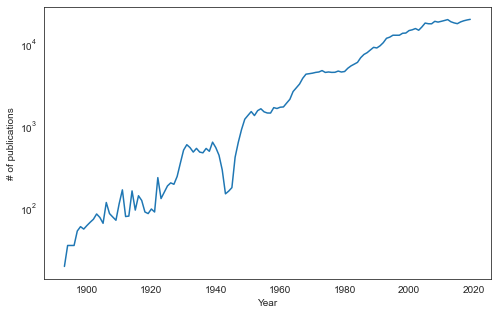

In [13]:
# lets plot the number of publications each year
yearly_articles = groupby_count(df=myaps.pub_df, colgroupby='Year', colcountby='PublicationId', count_unique=True,
                               show_progress=True)
yearly_articles.sort_values(by='Year', inplace=True)
yearly_articles = yearly_articles.loc[yearly_articles['Year'] > 0]

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(yearly_articles['Year'],yearly_articles['PublicationIdCount'])

ax.set_xlabel('Year')
ax.set_ylabel("# of publications")
ax.set_yscale('log')

plt.show()

/Users/ajgates/.pyenv/versions/3.7.3/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


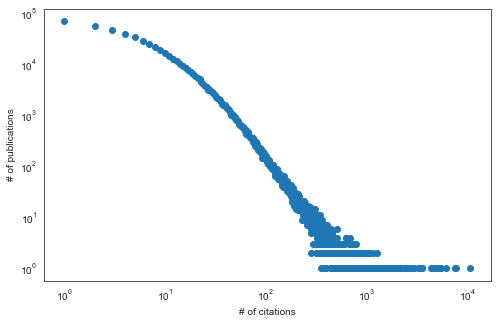

In [14]:
# now we can see the distribution of citation counts 
citations = groupby_count(df=myaps.pub2ref_df, colgroupby='CitedPublicationId', colcountby='CitingPublicationId', 
                          count_unique=True, show_progress=True)

citevalues, citecounts = np.unique(citations['CitingPublicationIdCount'].values, return_counts=True)

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.scatter(citevalues, citecounts)

ax.set_xlabel('# of citations')
ax.set_ylabel("# of publications")
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()